# Glass Identification

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
glass_df = pd.read_csv("glass.csv")
print("Successfully Imported Data!")
glass_df

Successfully Imported Data!


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


This dataset contains numerical data

In [3]:
glass_df.head(10)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


# Giving title to columns

In [4]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
glass_df.columns = names
glass_df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
glass_df.tail(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
203,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
204,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
205,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
206,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
207,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# Starting the EDA

In [6]:
# Checking dimension of Datas
glass_df.shape

(213, 11)

This dataset contains 213 rows and 11 columns out of which 10 are features and 1 is label(output)

In [7]:
# Checking data type
glass_df.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

 All the data columns have continuous data

In [8]:
# Checking for null values if any
glass_df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

There are no null values present in this dataset

In [9]:
#Checking detail information
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          213 non-null    int64  
 1   RI          213 non-null    float64
 2   Na          213 non-null    float64
 3   Mg          213 non-null    float64
 4   Al          213 non-null    float64
 5   Si          213 non-null    float64
 6   K           213 non-null    float64
 7   Ca          213 non-null    float64
 8   Ba          213 non-null    float64
 9   Fe          213 non-null    float64
 10  glass_type  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


This gives the detail information about dataset

In [11]:
# Dropping unwanted column Id
glass_df=glass_df.drop('Id',1)

In [12]:
#Checking description of dataset
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


- The Counts of all the columns are same means no missing values are present in the dataset
- Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first
- The features are not on the same scale. I.e. Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale

# Data Visualization

2    76
1    69
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64


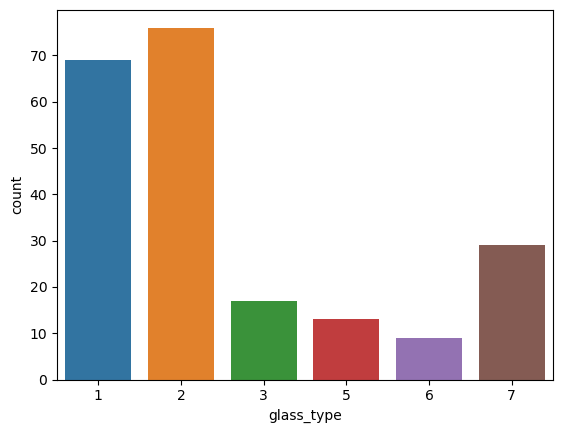

In [14]:
#Visualize by countplot
ax=sns.countplot(x='glass_type',data=glass_df)
print(glass_df['glass_type'].value_counts())

- From the plot we can observe that Most of our quality scores are 1s and 2s i.e building_windows_float_processed, building_windows_non_float_processed

In [15]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

x = glass_df[features]

y = glass_df[label]
     

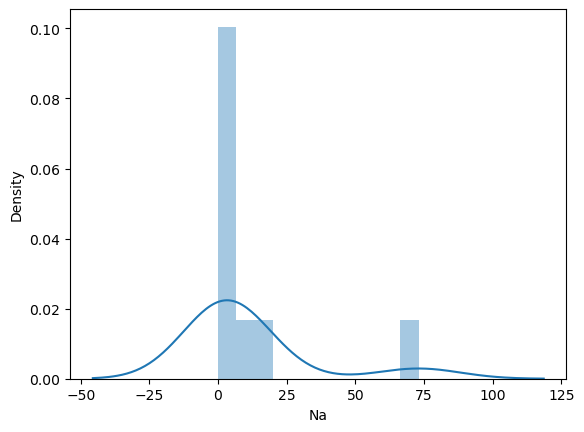

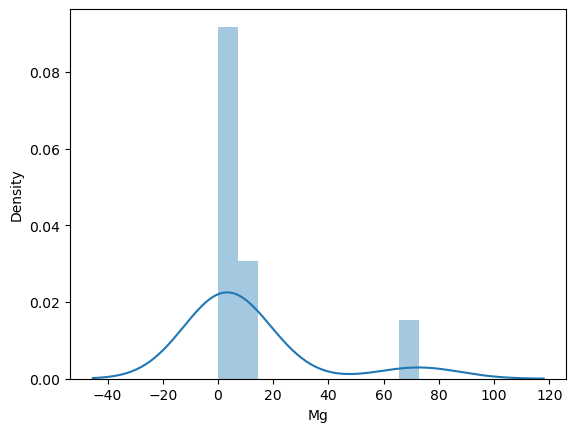

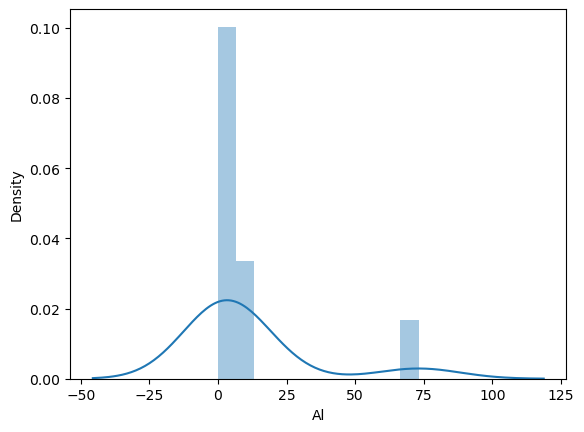

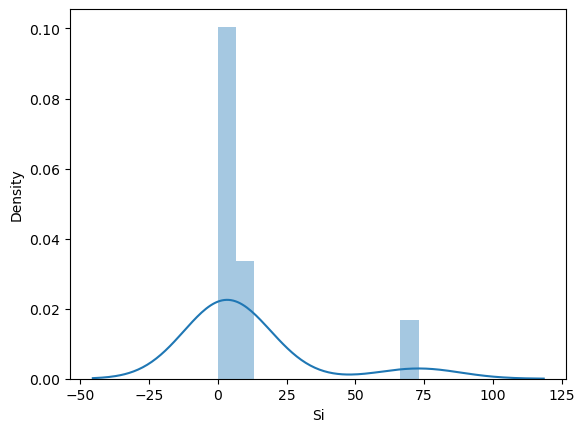

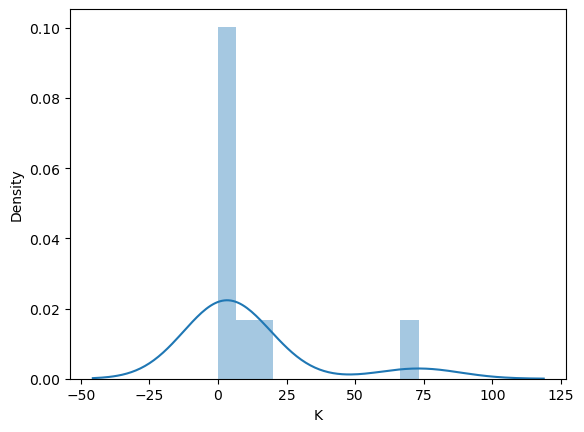

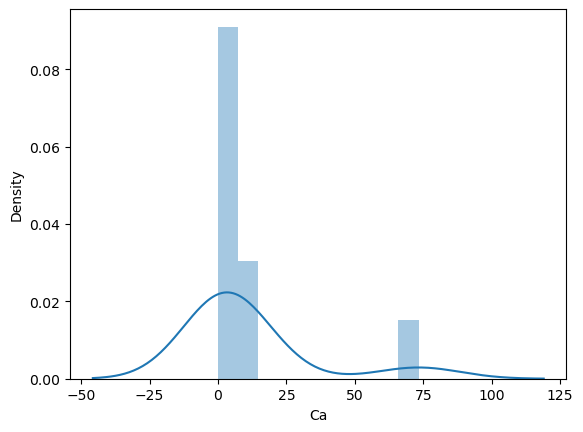

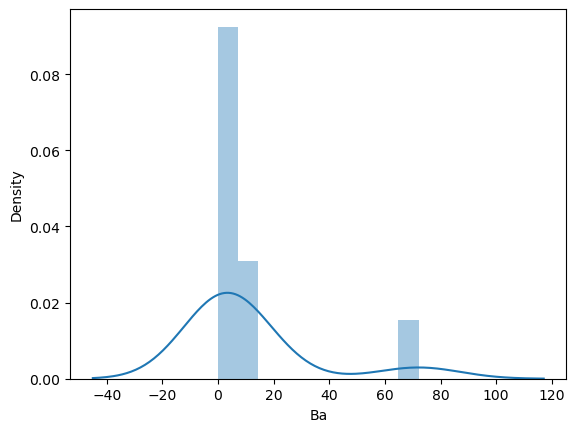

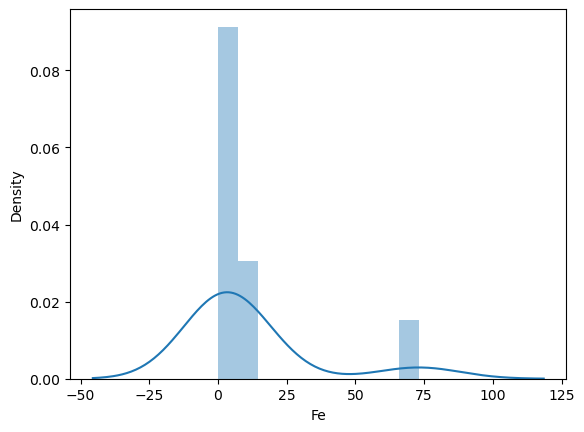

In [17]:
x_data = x.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x_data[i])
        plt.xlabel(features[i])
        plt.show()

- Our dataset is skewed either on positive side or negative side and data is not normalized.

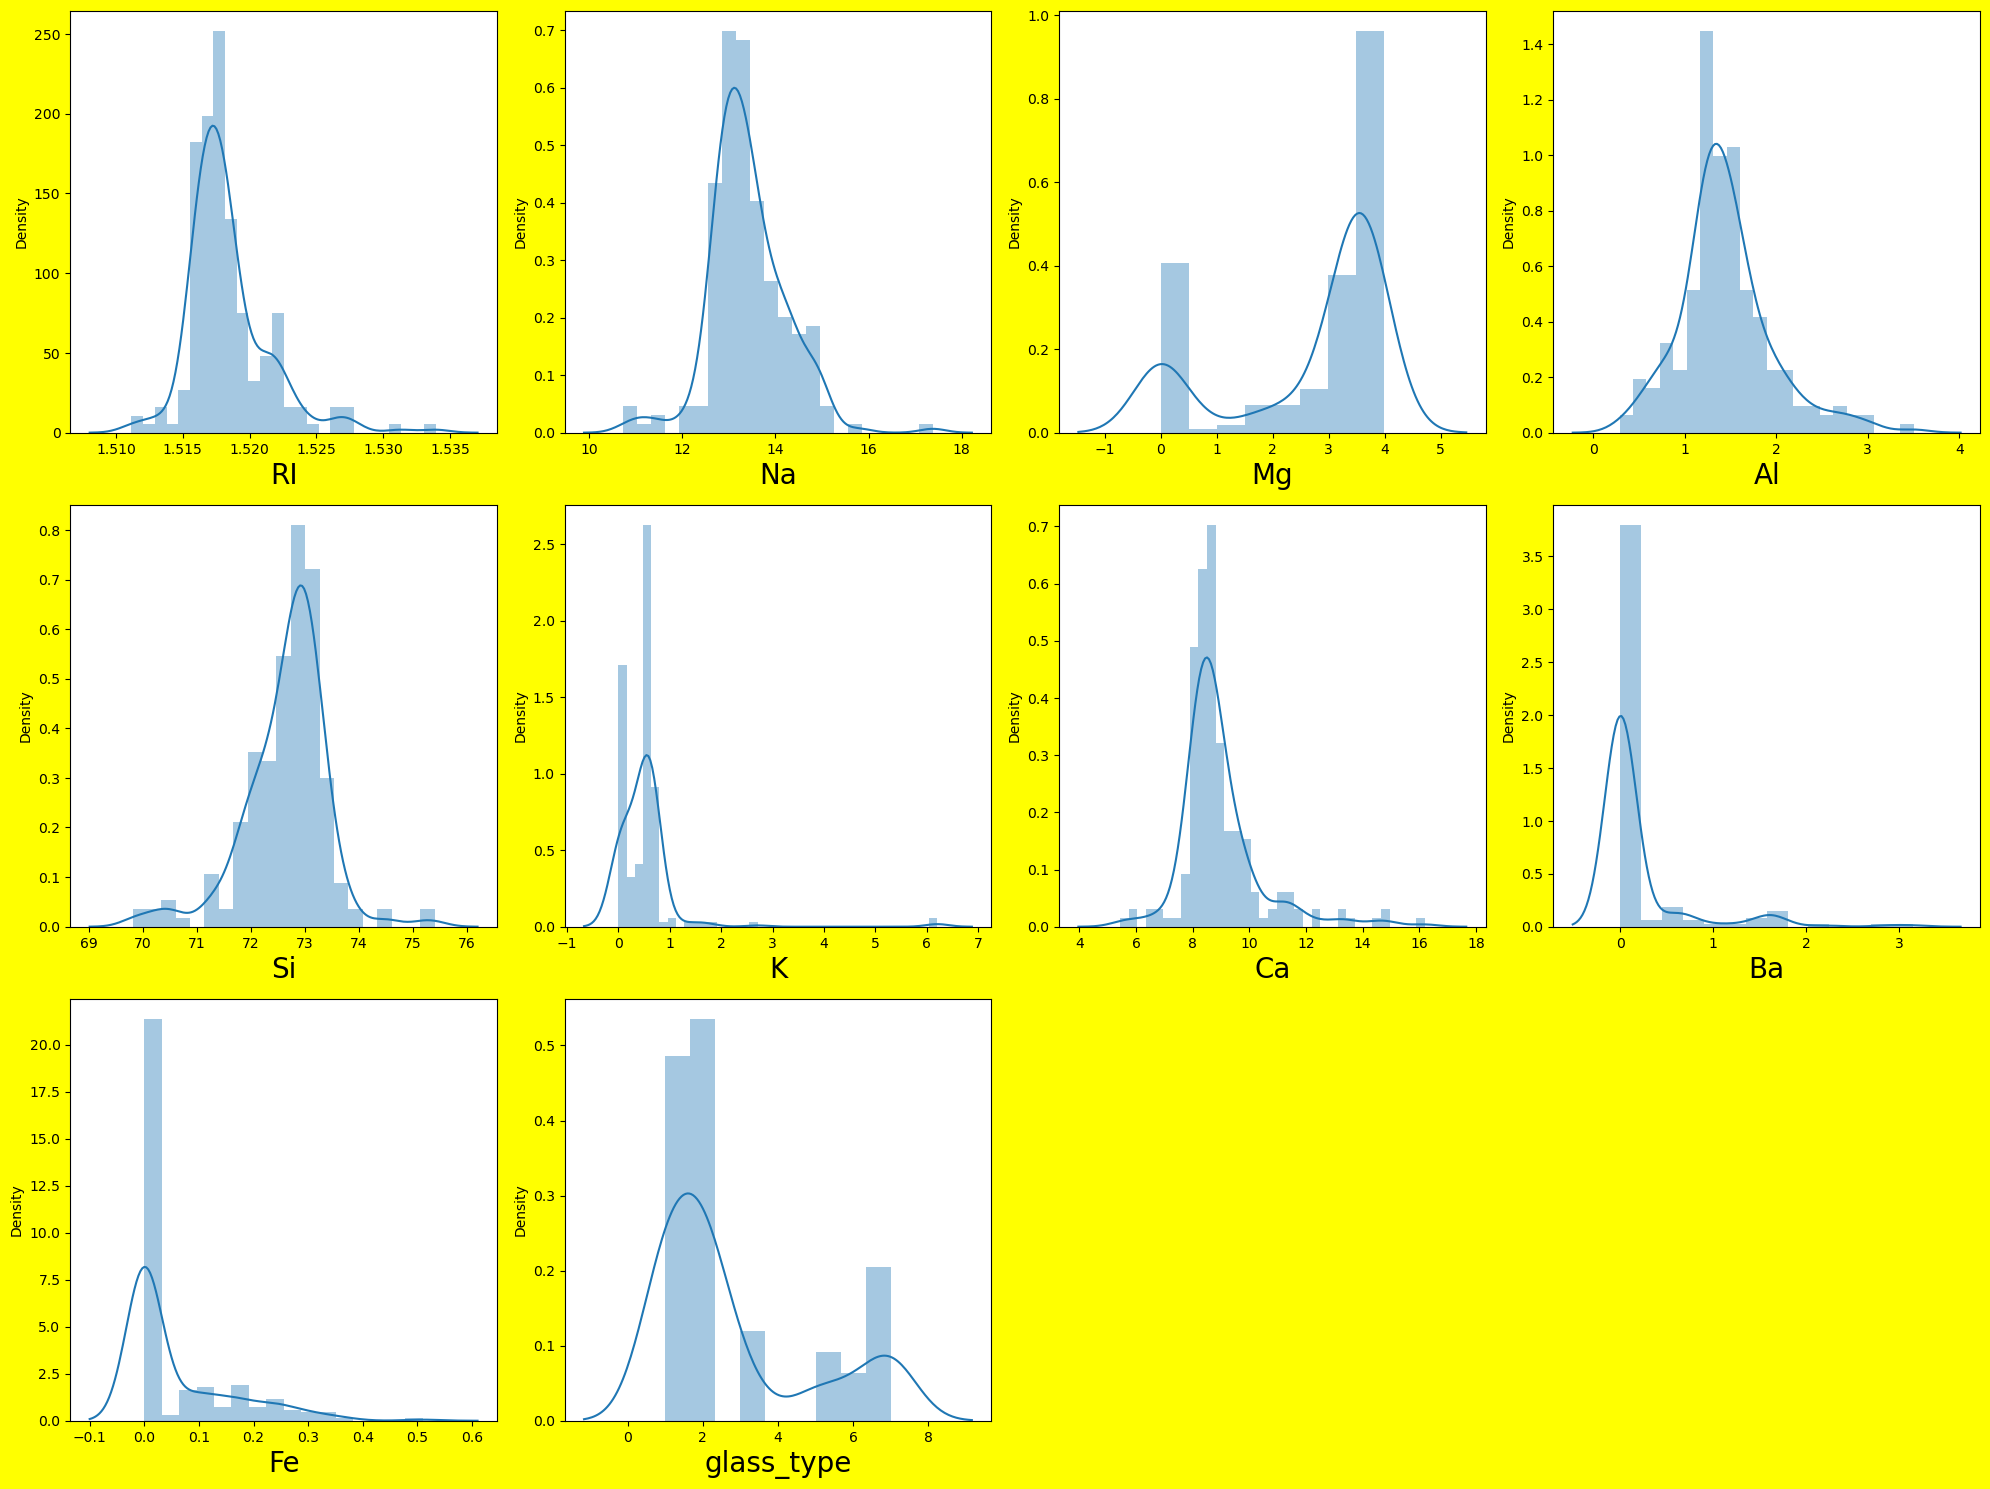

In [19]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in glass_df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(glass_df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

- From the above distribution plot, I noticed that the data not normaly distributed.Looks like outliers are present in Mg,K,Ca,Ba,Fe columns.

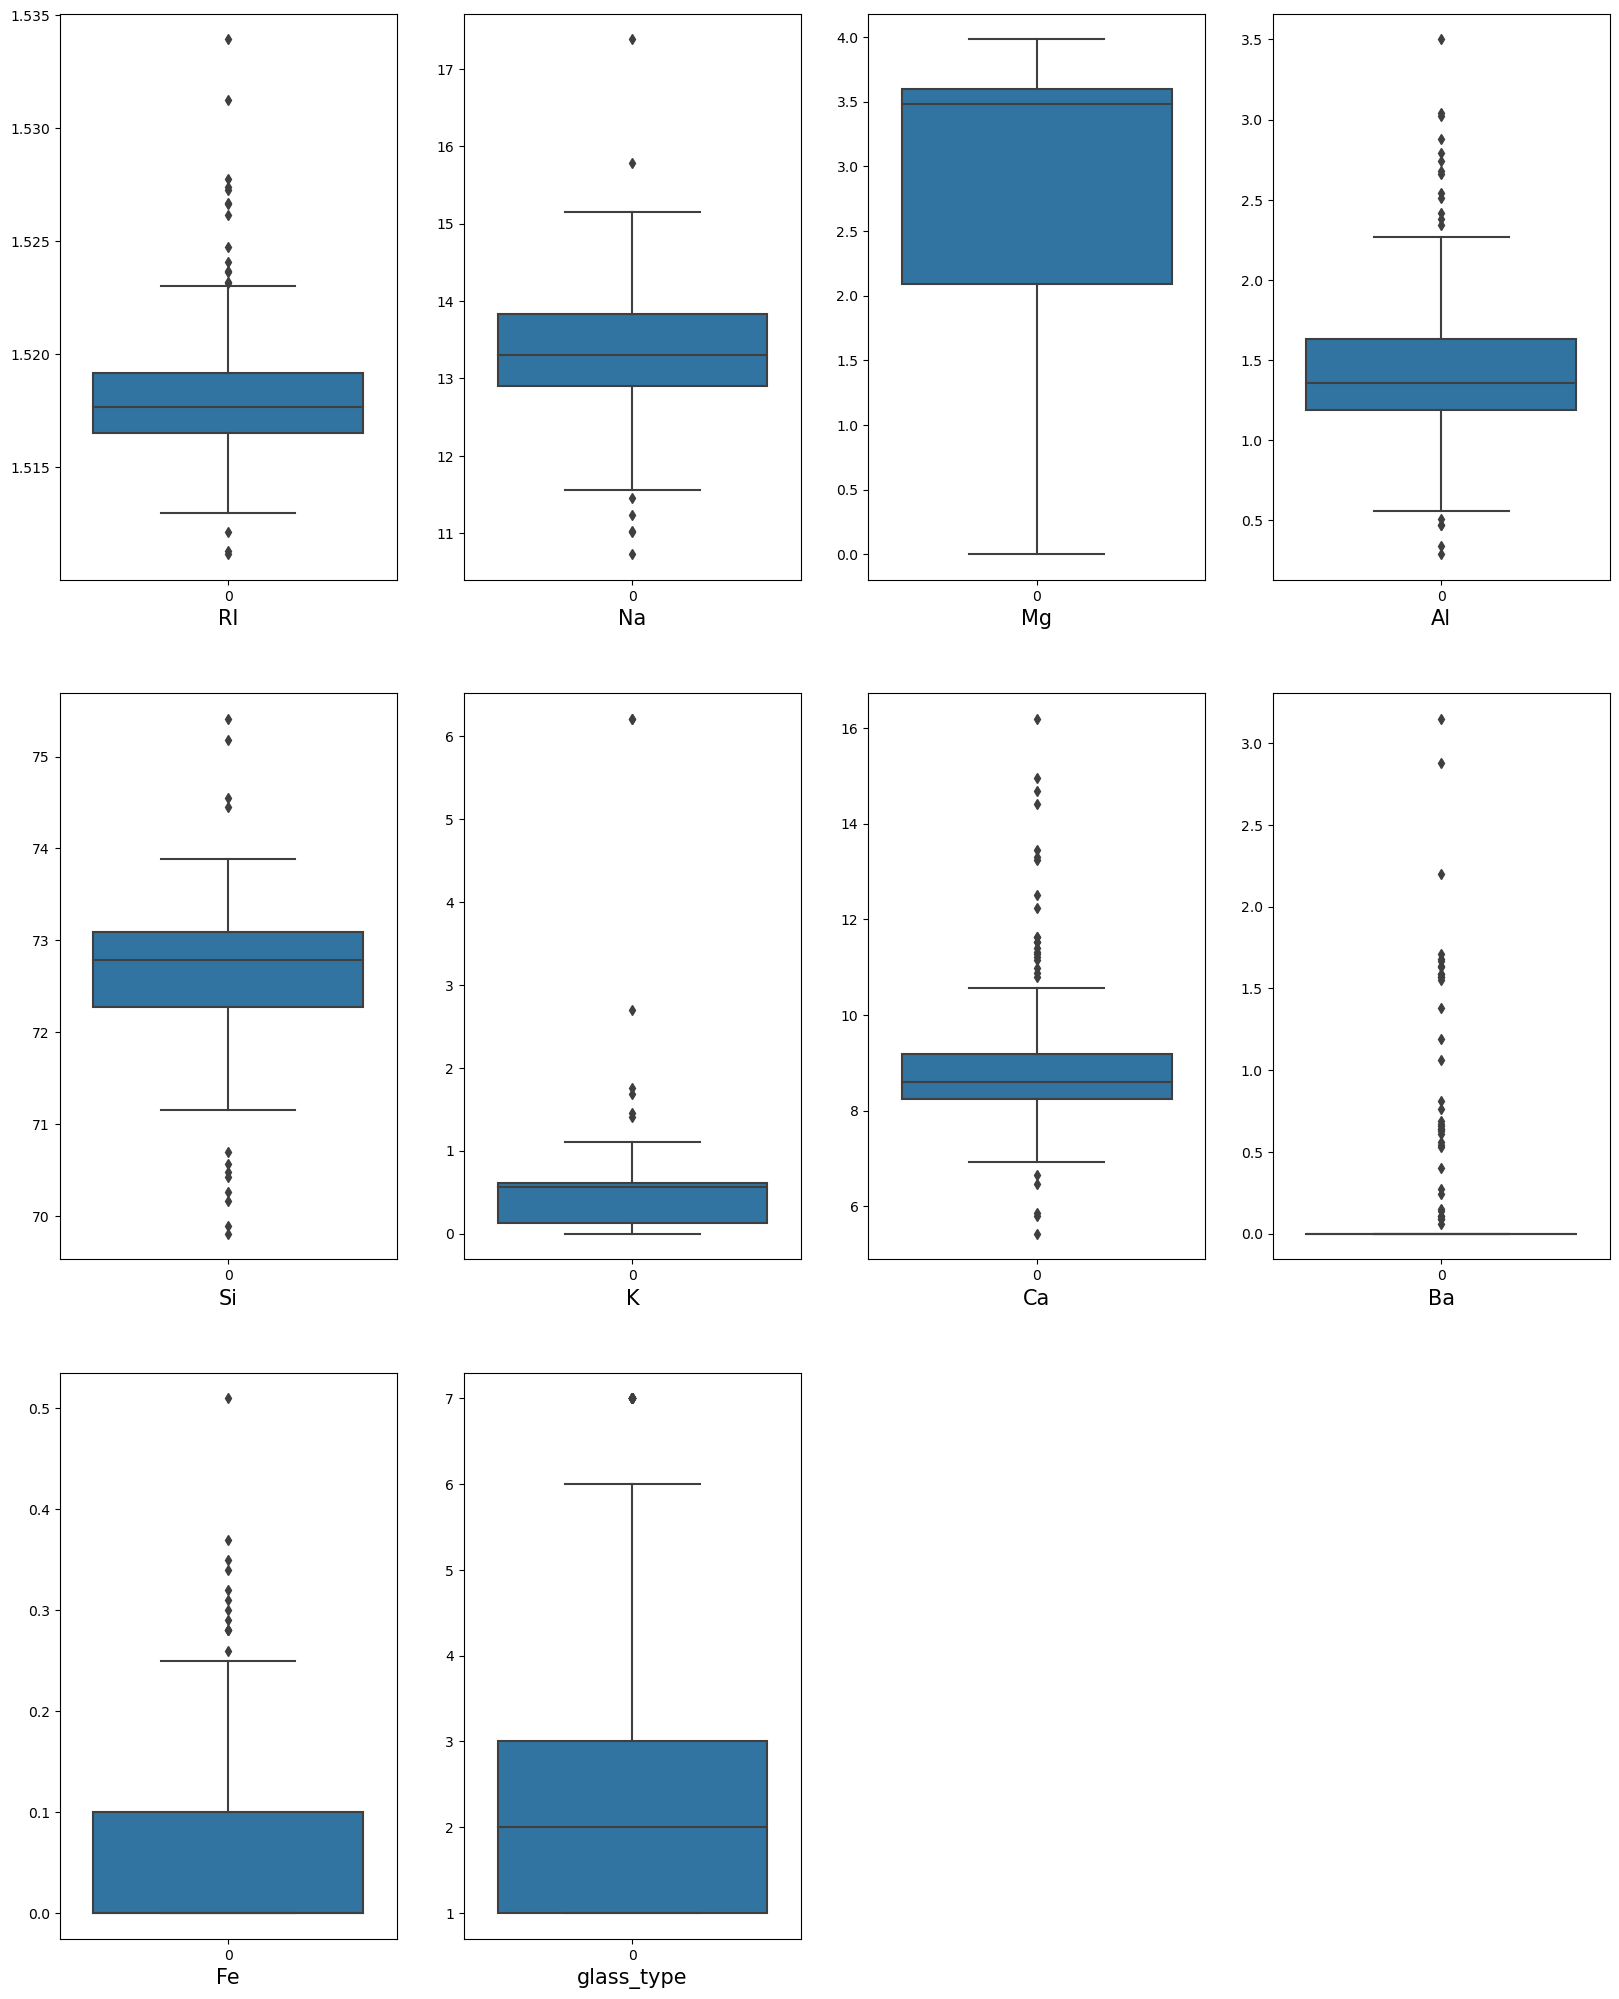

In [20]:
# Now visualize the data using boxplot for getting more idea abot outliers
plt.figure(figsize =(20,25))
graph = 1

for column in glass_df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=glass_df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

- From the boxplot, We noticed that,Outliers are present in RI,Na,Mg,Ai,Si,Ca,Ba,Fe columns. but as We cannot remove any data due to the small number of data we will move forward with the existing columns 

In [30]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# Removing outliers using z-score

In [33]:
from scipy.stats import zscore
features=glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
z=np.abs(zscore(features))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301
1,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301
2,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301
3,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301
4,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200
...,...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301
209,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301
210,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301
211,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301


In [34]:
threshold=3
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [35]:
# Now removing the data above zscore and creating new df
glass_df_new=glass_df[(z<3).all(axis=1)]
print("Data with outliers::",glass_df.shape)
print("Data after removing outliers::",glass_df_new.shape)

Data with outliers:: (213, 10)
Data after removing outliers:: (193, 10)


In [36]:
a = glass_df.shape[0]

In [37]:
b = glass_df_new.shape[0]

In [38]:
print('Data Loss Percentage - ',((a-b)/a)*100)

Data Loss Percentage -  9.389671361502346


- It is affordable loss of data now we will check with IQR method

# IQR Method

In [40]:
# 1st Quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

In [41]:
# IQR
IQR = Q3 - Q1
IQR

df2 = glass_df[~((glass_df < (Q1 - 1.5 * IQR)) |(glass_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(135, 10)

In [42]:
print('Data Loss Percentage - ',((glass_df.shape[0]-df2.shape[0])/glass_df.shape[0])*100)

Data Loss Percentage -  36.61971830985916


- Almost 37% data is removed using IQR method

- so we are using z-score method beacuse 9.38% data loss is in acceptable range.

In [43]:
# Now we proceed with new dataset
df=glass_df_new
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


# Checking For Skewness


In [56]:
df.skew()

RI            0.971729
Na            0.375857
Mg           -1.533664
Al            0.649917
Si           -0.436288
K             0.297900
Ca            1.074092
Ba            3.178256
Fe            1.478611
glass_type    1.277279
dtype: float64

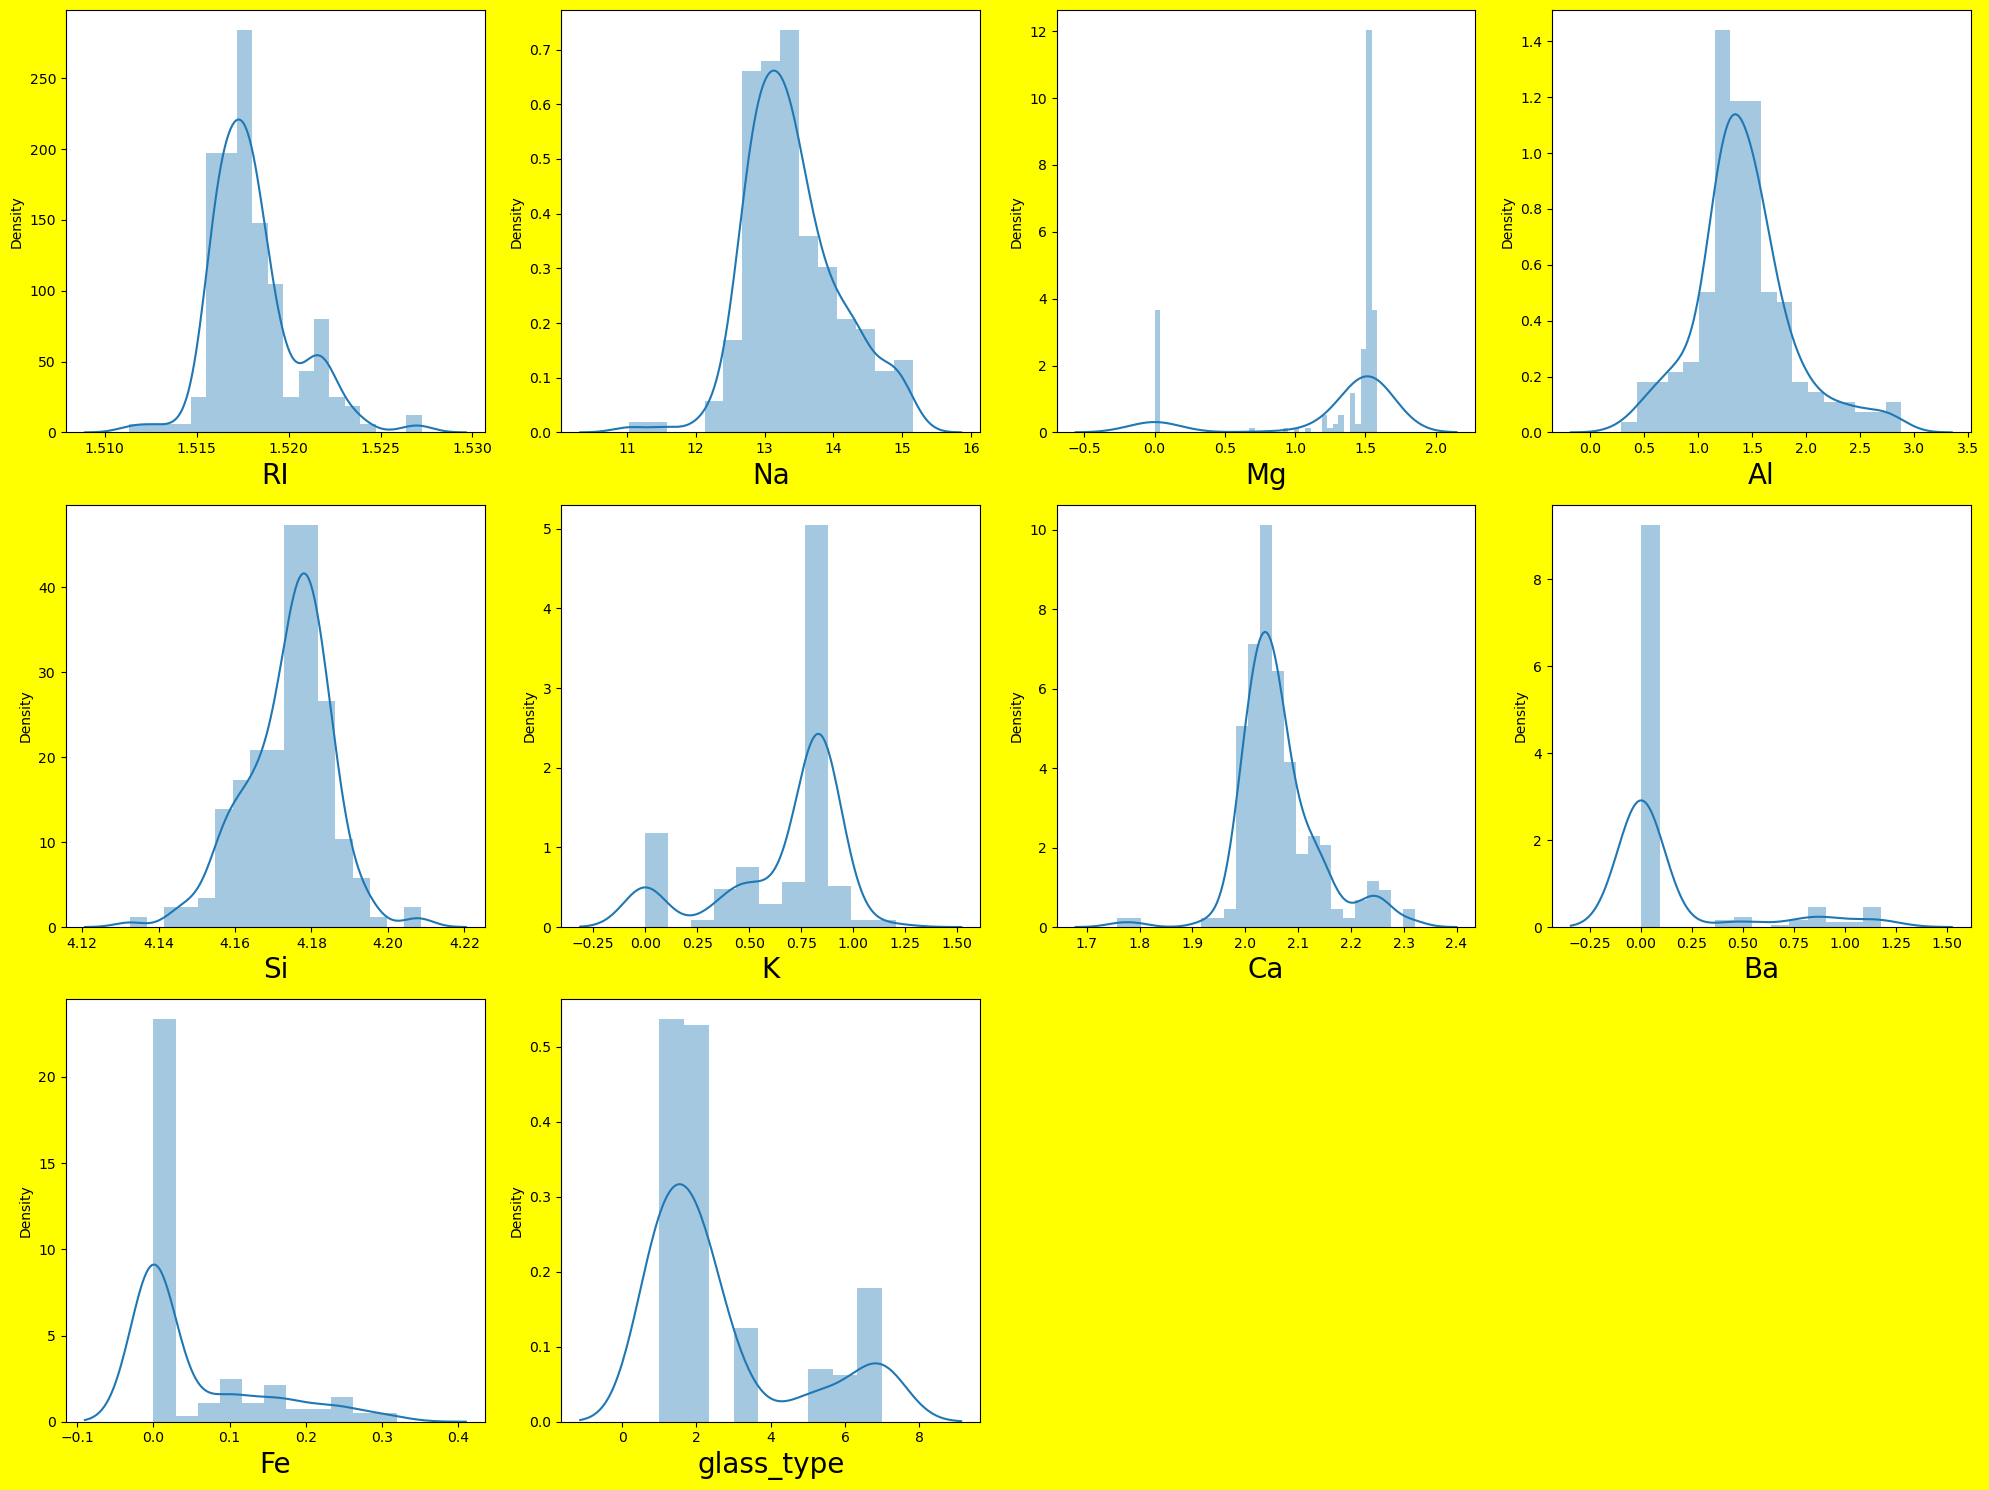

In [64]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

- looks like skewness is present in almost columns so we remove with cuberoot method

In [58]:
df['Mg']=np.cbrt(df['Mg'])

In [59]:
df['Si']=np.cbrt(df['Si'])

In [60]:
df['K']=np.cbrt(df['K'])

In [61]:
df['Ca']=np.cbrt(df['Ca'])

In [62]:
df['Ba']=np.cbrt(df['Ba'])

In [65]:
df['Fe']=np.cbrt(df['Fe'])

In [66]:
df.skew()

RI            0.971729
Na            0.375857
Mg           -1.892297
Al            0.649917
Si           -0.459112
K            -1.323411
Ca            0.609725
Ba            2.198820
Fe            0.875093
glass_type    1.277279
dtype: float64

In [67]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
RI,1.000000,0.048762,0.059043,-0.520285,-0.606014,-0.186323,0.693877,-0.224310,0.020867,-0.162981
Na,0.048762,1.000000,-0.528150,0.254805,-0.234473,-0.732857,0.018073,0.548616,-0.159948,0.535440
Mg,0.059043,-0.528150,1.000000,-0.579002,-0.358374,0.616427,-0.389498,-0.650990,0.113416,-0.781817
Al,-0.520285,0.254805,-0.579002,1.000000,0.332427,-0.167020,-0.222600,0.598833,-0.086766,0.659242
Si,-0.606014,-0.234473,-0.358374,0.332427,1.000000,-0.042582,-0.162629,0.180766,-0.002994,0.257096
K,-0.186323,-0.732857,0.616427,-0.167020,-0.042582,1.000000,-0.358613,-0.488714,0.133499,-0.612186
Ca,0.693877,0.018073,-0.389498,-0.222600,-0.162629,-0.358613,1.000000,-0.148647,0.013004,0.136329
Ba,-0.224310,0.548616,-0.650990,0.598833,0.180766,-0.488714,-0.148647,1.000000,-0.036261,0.700780
Fe,0.020867,-0.159948,0.113416,-0.086766,-0.002994,0.133499,0.013004,-0.036261,1.000000,-0.185437
glass_type,-0.162981,0.535440,-0.781817,0.659242,0.257096,-0.612186,0.136329,0.700780,-0.185437,1.000000


- seems like Features and label are correlated but we need more proof to make sure they really corelated.so we will use other techniques to study the realtionship further

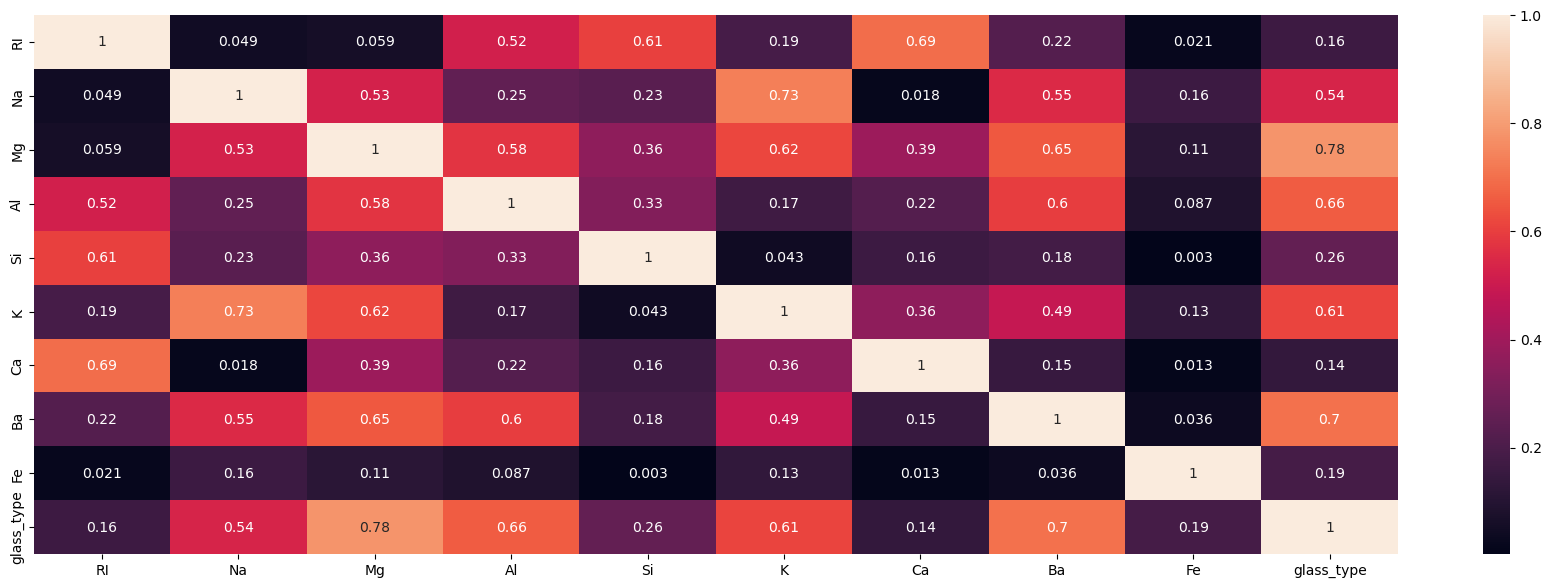

In [68]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()

- The good thing is we can't see any multicollinearity among features. Generally features has multicollinearity if they have 90% correlationship.


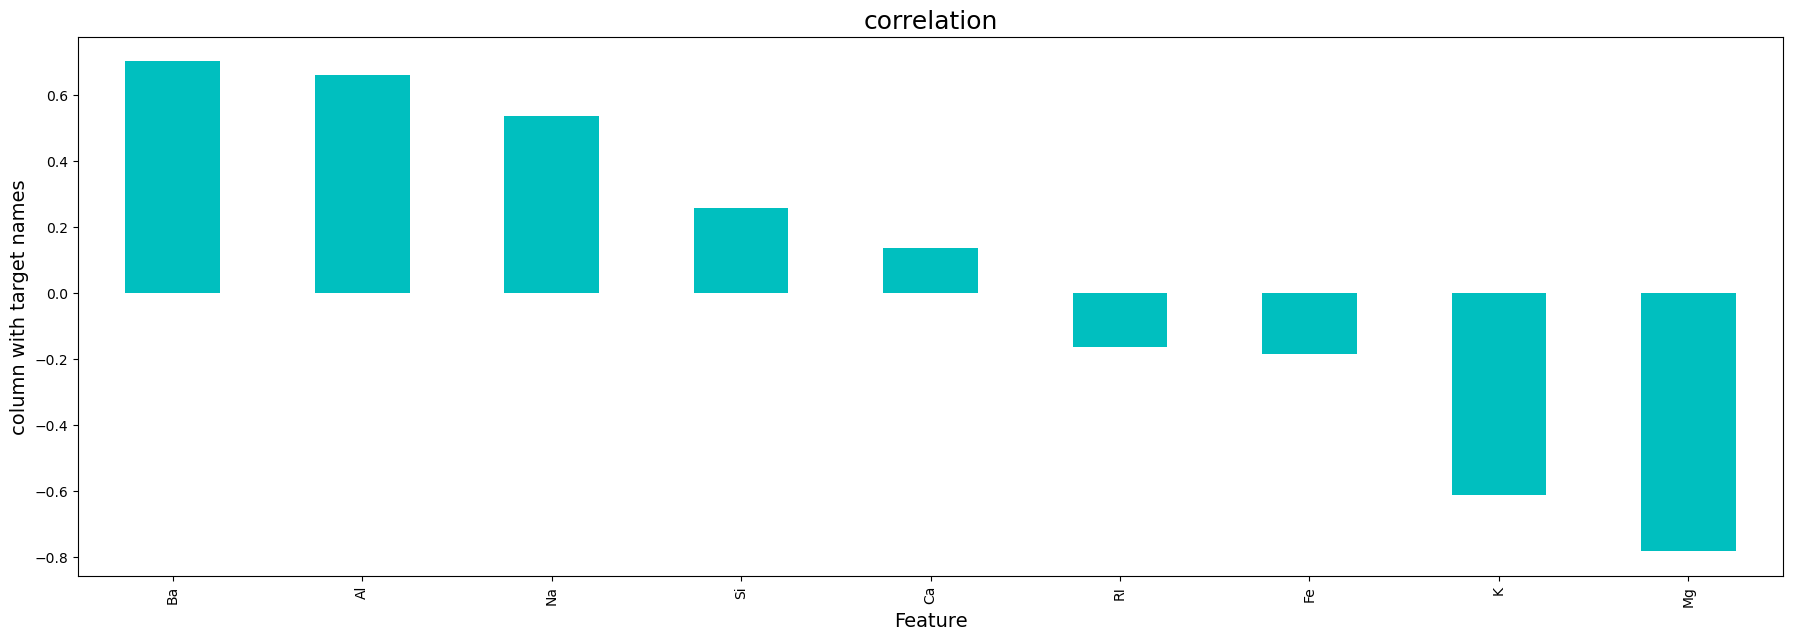

In [69]:
#Checking the columns which are positively and negatively correlated with the quality column

plt.figure(figsize=(22,7))
df.corr()['glass_type'].sort_values(ascending=False).drop(['glass_type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- From the above study we see that :-

- the correlation btw feature and lable is significat to remove any features and due to small size of data we will not remove any data

- we also see the most positive correalation btw Ai,Ba,Na,Si.

- we see that the Mg,k,Fe,RI are negatively correlaeted 

# Separate the data into Features and lable

In [70]:
x= df.drop(['glass_type'],axis=1)
y=df['glass_type']

In [71]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,1.532619,1.36,4.174180,0.782974,1.985732,0.000000,0.00000
1,1.51618,13.53,1.525490,1.54,4.179148,0.730614,1.981496,0.000000,0.00000
2,1.51766,13.21,1.545286,1.29,4.171883,0.829134,2.018168,0.000000,0.00000
3,1.51742,13.27,1.535452,1.24,4.180865,0.819321,2.005816,0.000000,0.00000
4,1.51596,12.79,1.534037,1.62,4.178767,0.861774,2.005816,0.000000,0.63825
...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.000000,2.74,4.176475,0.000000,2.114190,0.814325,0.00000
208,1.51623,14.14,0.000000,2.88,4.171883,0.430887,2.093860,1.019613,0.00000
209,1.51685,14.92,0.000000,1.99,4.180484,0.000000,2.032793,1.167165,0.00000
210,1.52065,14.36,0.000000,2.02,4.187339,0.000000,2.036014,1.179274,0.00000


In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: glass_type, Length: 193, dtype: int64

# Standardization of data

In [73]:
from sklearn.preprocessing import StandardScaler


In [74]:
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [75]:
x_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.191475,0.704498,0.484188,-0.145324,0.010415,0.401941,-1.035703,-0.416569,-0.680595
1,-0.819092,0.169658,0.470877,0.260836,0.456906,0.225781,-1.091935,-0.416569,-0.680595
2,-0.169531,-0.305754,0.507839,-0.303276,-0.196017,0.557248,-0.605107,-0.416569,-0.680595
3,-0.274865,-0.216615,0.489477,-0.416098,0.611214,0.524232,-0.769075,-0.416569,-0.680595
4,-0.915648,-0.929734,0.486835,0.441351,0.422598,0.667062,-0.769075,-0.416569,1.848061
...,...,...,...,...,...,...,...,...,...
188,-0.722535,1.417617,-2.377492,2.968571,0.216620,-2.232341,0.669606,2.063771,-0.680595
189,-0.797147,1.075914,-2.377492,3.284473,-0.196017,-0.782640,0.399720,2.689053,-0.680595
190,-0.525034,2.234732,-2.377492,1.276236,0.576934,-2.232341,-0.410958,3.138481,-0.680595
191,1.142758,1.402760,-2.377492,1.343930,1.193013,-2.232341,-0.368191,3.175362,-0.680595


In [76]:
#Checking multicollinearity among features with variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif


,Score,features
0,5.143325,RI
1,8.451983,Na
2,13.957832,Mg
3,3.488473,Al
4,5.852193,Si
5,4.957205,K
6,9.023399,Ca
7,3.841826,Ba
8,1.060068,Fe


# Model Building

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [79]:
#Splitting Dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [80]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)

        print('=======================Train result======================')
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')


    elif train==False:
        pred=clf.predict(x_test)

        print('=======================Test Result=======================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\nClassification report\n',classification_report(y_test,pred,digits=2))

# Logistic Regression

In [81]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [90]:
predlr = lr.predict(x_test)
print("Confusion Matrix---")
print(confusion_matrix(y_test,predlr))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix---
[[13  6  1  0  0  0]
 [ 3 17  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 1  2  0  0  0  6]]
=======================Train result======================
accuracy score:73.33%
=======================Test Result=======================
accuracy_score:68.97%


Classification report
               precision    recall  f1-score   support

           1       0.65      0.65      0.65        20
           2       0.63      0.85      0.72        20
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         9

    accuracy                           0.69        58
   macro avg       0.71      0.69      0.70        58
weighted avg       0.67      0.69      0.67        58



We are getting very less accuracy with Logistic regression so lets use other algorithms

# Decision Tree Classifier

In [84]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [91]:
preddt = dt.predict(x_test)
print('Confusion Matrix')

print(confusion_matrix(y_test,predlr))
metric_score(dt,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score

Confusion Matrix
[[13  6  1  0  0  0]
 [ 3 17  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 1  2  0  0  0  6]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:74.14%


Classification report
               precision    recall  f1-score   support

           1       0.74      0.70      0.72        20
           2       0.74      0.85      0.79        20
           3       0.50      0.60      0.55         5
           5       1.00      1.00      1.00         1
           6       0.67      0.67      0.67         3
           7       1.00      0.67      0.80         9

    accuracy                           0.74        58
   macro avg       0.77      0.75      0.75        58
weighted avg       0.76      0.74      0.74        58



- Accuracy increased to 74.% approx , but still not much difference

# Random Forest Classifier

In [92]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,predlr))


metric_score(rf,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(rf,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[13  6  1  0  0  0]
 [ 3 17  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 1  2  0  0  0  6]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:79.31%


Classification report
               precision    recall  f1-score   support

           1       0.79      0.95      0.86        20
           2       0.74      0.85      0.79        20
           3       0.67      0.40      0.50         5
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         9

    accuracy                           0.79        58
   macro avg       0.87      0.70      0.74        58
weighted avg       0.81      0.79      0.78        58



- we got a higher 79 % accuracy , but lets try one more algorithm


# SVC

In [93]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print('Confusion Matrix')

print(confusion_matrix(y_test,predsvc))
metric_score(svc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[17  3  0  0  0  0]
 [ 4 16  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  0  0  1  0]
 [ 1  2  0  0  0  6]]
=======================Train result======================
accuracy score:77.78%
=======================Test Result=======================
accuracy_score:70.69%


Classification report
               precision    recall  f1-score   support

           1       0.68      0.85      0.76        20
           2       0.64      0.80      0.71        20
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         9

    accuracy                           0.71        58
   macro avg       0.72      0.61      0.63        58
weighted avg       0.68      0.71      0.67        58



- WE again got a lesser score on SVC 

# KNN Model

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predknn))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[16  4  0  0  0  0]
 [ 3 16  0  1  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 1  2  0  0  0  6]]
=======================Train result======================
accuracy score:73.33%
=======================Test Result=======================
accuracy_score:68.97%


Classification report
               precision    recall  f1-score   support

           1       0.65      0.65      0.65        20
           2       0.63      0.85      0.72        20
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         9

    accuracy                           0.69        58
   macro avg       0.71      0.69      0.70        58
weighted avg       0.67      0.69      0.67        58



# ADA BOOST CLASSIFIER

In [97]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predadb))

metric_score(adb,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(adb,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[20  0  0  0  0  0]
 [19  0  0  1  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  3  0  0]
 [ 3  0  0  0  0  6]]
=======================Train result======================
accuracy score:52.59%
=======================Test Result=======================
accuracy_score:46.55%


Classification report
               precision    recall  f1-score   support

           1       0.43      1.00      0.60        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         5
           5       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         3
           7       1.00      0.67      0.80         9

    accuracy                           0.47        58
   macro avg       0.27      0.44      0.29        58
weighted avg       0.31      0.47      0.34        58



# BAGGING CLASSIFIER

In [98]:
bgc=BaggingClassifier()
bgc.fit(x_train,y_train)
predbgc = bgc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predbgc))

metric_score(bgc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(bgc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[16  3  1  0  0  0]
 [ 2 17  1  0  0  0]
 [ 1  0  4  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 1  0  0  0  0  8]]
=======================Train result======================
accuracy score:99.26%
=======================Test Result=======================
accuracy_score:82.76%


Classification report
               precision    recall  f1-score   support

           1       0.80      0.80      0.80        20
           2       0.81      0.85      0.83        20
           3       0.67      0.80      0.73         5
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        58
   macro avg       0.88      0.83      0.85        58
weighted avg       0.84      0.83      0.83        58



# Gradient Boosting classifier

In [99]:
grbc=GradientBoostingClassifier()
grbc.fit(x_train,y_train)
predgrbc = grbc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predgrbc))

metric_score(grbc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(grbc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[18  2  0  0  0  0]
 [ 3 16  1  0  0  0]
 [ 2  1  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  1  1  0]
 [ 1  2  0  0  0  6]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:75.86%


Classification report
               precision    recall  f1-score   support

           1       0.75      0.90      0.82        20
           2       0.73      0.80      0.76        20
           3       0.67      0.40      0.50         5
           5       0.50      1.00      0.67         1
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         9

    accuracy                           0.76        58
   macro avg       0.77      0.68      0.67        58
weighted avg       0.78      0.76      0.75        58



# Cross Validation

In [100]:
# cv score for Decision Tree Classifier
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvdt)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddt)-cvdt)

CV score for Decision Tree Classifier: 0.6210526315789473
And Difference between CV and accuracy_score= 0.12032667876588032


In [101]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print('CV score for Random Forest Classifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score for Random Forest Classifier: 0.720242914979757
And Difference between CV and accuracy_score= 0.07286053329610509


In [102]:
# cv score for svc
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score for svc:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score for svc: 0.43589743589743585
And Difference between CV and accuracy_score= 0.27099911582670205


In [103]:
# cv score for KNN Model
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score for KNN Model:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score for KNN Model: 0.6423751686909582
And Difference between CV and accuracy_score= 0.06452138303317967


In [104]:
# cv score for ADA BOOST CLASSIFIER
cvadb=cross_val_score(adb,x,y,cv=10).mean()
print('CV score for ADA BOOST CLASSIFIER:',cvadb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predadb)-cvadb)

CV score for ADA BOOST CLASSIFIER: 0.476578947368421
And Difference between CV and accuracy_score= -0.01106170598911066


In [105]:
# cv score for BAGGING CLASSIFIER
cvbgc=cross_val_score(bgc,x,y,cv=10).mean()
print('CV score for BAGGING CLASSIFIER:',cvbgc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predbgc)-cvbgc)

CV score for BAGGING CLASSIFIER: 0.6884210526315789
And Difference between CV and accuracy_score= 0.13916515426497278


In [106]:
# cv score for Gradient Boosting classifier
cvgrbc=cross_val_score(grbc,x,y,cv=10).mean()
print('CV score for Gradient Boosting classifier:',cvgrbc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgrbc)-cvgrbc)

CV score for Gradient Boosting classifier: 0.7302631578947368
And Difference between CV and accuracy_score= 0.02835753176043554


- From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model

# Hyper parameter Tuning

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#Creating parameters to pass in GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}

GCV = GridSearchCV(estimator =rf,param_grid=parameters,cv=8,scoring='accuracy')
GCV.fit(x_train,y_train) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'criterion': 'gini', 'max_features': 'log2'}

In [136]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.8103448275862069

- Our best model with best parameters has given accuracy of 81%

# Saving the best classification model

In [115]:
import pickle
filename = 'glass_type_prediction.pkl'
pickle.dump(GCV,open(filename,'wb'))

In [116]:
loaded_model = pickle.load(open('glass_type_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

86.20689655172413


In [117]:
### Predicting the Output
original = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df_new = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new.sample(20)

,Original,Predicted
26,1,1
54,7,7
52,2,2
35,2,2
53,2,2
6,3,2
25,1,1
34,1,1
40,3,1
19,2,2


# Conclusion:--
# We can see our model has predicted same ouputs in almost cases.

# The prediction results indicated that Random Forest Classifier model achieved excellent prediction accuracy.
